In [95]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle

In [59]:
server_util = np.zeros((18,50))
average_queue = np.zeros((18,50))
average_wait = np.zeros((18,50))

In [62]:
df = pd.read_table(file_guy)
df = df.dropna(axis='index', how='any')
df.columns = ['Time', 'Event', 'Count', 'M', 'S', 'Q', 'R[T]', 'RATIO']
df['Time'] = df['Time'].astype('float')
df1 = df.iloc[1:,:].reset_index()
df['Amount'] = df1['Time'] - df['Time']
df["S'"] = 1 - df['S']
df["S weight"] = df["S'"]*df['Amount']
df['Q weight'] = df["Q"]*df['Amount']
df['Hour'] = (df['Time']/3600).astype('int')

10
[ 0.16940889  0.09357667  0.10711639  0.09197833  0.12183444  0.19903389
  0.1844975   0.18594222  0.18807333  0.25949583  0.356985    0.32024639
  0.35706611  0.41535306  0.33895389  0.31113667  0.24247806  0.0741575 ]
[ 1.54879528  0.01305639  0.00743417  0.00278778  0.01763861  0.03585194
  0.03714472  0.03874194  0.0624575   0.09527833  0.211055    0.11139778
  0.25004111  0.37255     0.17982583  0.07908417  0.11309778  0.00744028]
[ 7.16162936  0.06037274  0.03437559  0.01289068  0.08156094  0.16577939
  0.1717572   0.17914275  0.28880348  0.44056701  0.97591832  0.51510332
  1.1561901   1.7226712   0.83151465  0.36568519  0.52296412  0.03440384]


In [44]:
df.head(5)

,Time,Event,Count,M,S,Q,R[T],RATIO,Amount,S',S weight,Q weight,Hour
0,0.0,Initial,1.0,1.0,1.0,38.0,0.0233,0.0,0.0,0.0,0.0,0.0,0
1,0.0,NEIC,1.0,0.0,1.0,38.0,0.0233,0.0,0.0,0.0,0.0,0.0,0
2,0.0,Arrive,1.0,0.0,1.0,39.0,0.0233,0.0,0.0,0.0,0.0,0.0,0
3,0.0,Begin,1.0,0.0,0.0,38.0,0.0233,0.0,0.0,1.0,0.0,0.0,0
4,0.0,Resched,1.0,0.0,0.0,38.0,0.0233,0.0,0.0,1.0,0.0,0.0,0


In [55]:
# server utilization by hour
(df.groupby('Hour')['S weight'].sum()/3600).values[:-1]

array([ 0.17763111,  0.09747972,  0.09852972,  0.09584833,  0.11343028,
        0.20655   ,  0.14446722,  0.18117194,  0.16148139,  0.21827139,
        0.35182389,  0.40005583,  0.32061972,  0.39740139,  0.35117194,
        0.36093361,  0.20382917,  0.086525  ])

In [53]:
# average queue length by hour
(df.groupby('Hour')['Q weight'].sum()/3600).values[:-1]

array([ 1.78243611,  0.01296444,  0.006255  ,  0.00414583,  0.00779194,
        0.03420361,  0.0205275 ,  0.05005778,  0.04624444,  0.08425861,
        0.34386833,  0.27147028,  0.13336139,  0.29227611,  0.22347417,
        0.20964417,  0.06598222,  0.01054083])

In [54]:
# average wait time (seconds) per hour
(df.groupby('Hour')['Q weight'].sum()/3600*4.624).values[:-1]

array([ 8.24198458,  0.05994759,  0.02892312,  0.01917033,  0.03602995,
        0.1581575 ,  0.09491916,  0.23146716,  0.21383431,  0.38961182,
        1.59004717,  1.25527856,  0.61666306,  1.35148474,  1.03334455,
        0.96939463,  0.3051018 ,  0.04874081])

In [103]:
swipers = 1
indices = np.arange(50)

server_util = np.zeros((18,50))
average_queue = np.zeros((18,50))
average_wait = np.zeros((18,50))

for i in indices:
    file_guy = 'data%s/run%s.txt' % (swipers, i+1)
    df = pd.read_table(file_guy)
    
    # drop the summary stats at bottom and remove spaces from column names
    df = df.dropna(axis='index', how='any')
    df.columns = ['Time', 'Event', 'Count', 'M', 'S', 'Q', 'R[T]', 'RATIO']
    
    df['Time'] = df['Time'].astype('float')
    
    df0 = df.iloc[1:,:].reset_index()
    
    # Calculate amount of time between each event
    df['Amount'] = df0['Time'] - df['Time']
    
    # create column for number of active servers
    df["S'"] = swipers - df['S']
    
    # create columns for weighted times of active servers and queue lengths
    df["S weight"] = df["S'"]*df['Amount']
    df['Q weight'] = df["Q"]*df['Amount']
    
    df['Hour'] = (df['Time']/3600).astype('int')

    # server utilization by hour
    server_util[:,i] = (df.groupby('Hour')['S weight'].sum()/3600).values[:-1]

    # average queue length by hour
    average_queue[:,i] = (df.groupby('Hour')['Q weight'].sum()/3600).values[:-1]

    # average wait time (seconds) per hour
    average_wait[:,i] = (df.groupby('Hour')['Q weight'].sum()/3600*4.624).values[:-1]

In [104]:
# put all our statistics into a df
df1 = pd.DataFrame(data=[server_util.mean(axis=1),
                        server_util.std(axis=1, ddof=1),
                        server_util.mean(axis=1)+1.65*server_util.std(axis=1, ddof=1),
                        average_queue.mean(axis=1),
                        average_queue.std(axis=1, ddof=1),
                        average_queue.mean(axis=1)+1.65*average_queue.std(axis=1, ddof=1),
                        average_wait.mean(axis=1),
                        average_wait.std(axis=1, ddof=1),
                        average_wait.mean(axis=1)+1.65*average_wait.std(axis=1, ddof=1)])

# the data was in rows instead of columns so transpose it
df1 = pd.DataFrame(np.transpose(df1.values))

df1.columns = ['Mean Server Util', 'Std Server Util', '95% Confidence Server Util',
              'Mean Queue Length', 'Std Queue Length',
              '95% Confidence Queue Length', 'Mean Wait (s)', 'Std Wait (s)',
              '95% Confidence Wait (s)']
df1

,Mean Server Util,Std Server Util,95% Confidence Server Util,Mean Queue Length,Std Queue Length,95% Confidence Queue Length,Mean Wait (s),Std Wait (s),95% Confidence Wait (s)
0,0.165510,0.018491,0.196021,1.518250,0.250758,1.932001,7.020388,1.159507,8.933574
1,0.106114,0.015537,0.131749,0.013342,0.007780,0.026179,0.061694,0.035973,0.121051
2,0.108317,0.017074,0.136489,0.011504,0.007239,0.023448,0.053193,0.033474,0.108425
3,0.105974,0.015809,0.132058,0.011457,0.006182,0.021658,0.052978,0.028588,0.100147
4,0.122673,0.019493,0.154836,0.017784,0.008966,0.032578,0.082232,0.041459,0.150639
5,0.188780,0.022266,0.225519,0.043929,0.014578,0.067982,0.203126,0.067407,0.314348
6,0.177453,0.019411,0.209481,0.042543,0.020373,0.076158,0.196721,0.094203,0.352156
7,0.175926,0.019252,0.207691,0.038249,0.016009,0.064664,0.176864,0.074027,0.299008
8,0.180245,0.024482,0.220640,0.043343,0.018863,0.074467,0.200420,0.087222,0.344336
9,0.258972,0.022672,0.296380,0.103547,0.034675,0.160761,0.478803,0.160337,0.743358


In [105]:
swipers = 2
indices = np.arange(50)

server_util = np.zeros((18,50))
average_queue = np.zeros((18,50))
average_wait = np.zeros((18,50))

for i in indices:
    file_guy = 'data%s/run%s.txt' % (swipers, i+1)
    df = pd.read_table(file_guy)
    
    # drop the summary stats at bottom and remove spaces from column names
    df = df.dropna(axis='index', how='any')
    df.columns = ['Time', 'Event', 'Count', 'M', 'S', 'Q', 'R[T]', 'RATIO']
    
    df['Time'] = df['Time'].astype('float')
    
    df0 = df.iloc[1:,:].reset_index()
    
    # Calculate amount of time between each event
    df['Amount'] = df0['Time'] - df['Time']
    
    # create column for number of active servers
    df["S'"] = swipers - df['S']
    
    # create columns for weighted times of active servers and queue lengths
    df["S weight"] = df["S'"]*df['Amount']
    df['Q weight'] = df["Q"]*df['Amount']
    
    df['Hour'] = (df['Time']/3600).astype('int')

    # server utilization by hour
    server_util[:,i] = (df.groupby('Hour')['S weight'].sum()/(3600*swipers)).values[:-1]

    # average queue length by hour
    average_queue[:,i] = (df.groupby('Hour')['Q weight'].sum()/3600).values[:-1]

    # average wait time (seconds) per hour
    average_wait[:,i] = (df.groupby('Hour')['Q weight'].sum()/3600*4.624).values[:-1]

In [106]:
# put all our statistics into a df
df2 = pd.DataFrame(data=[server_util.mean(axis=1),
                        server_util.std(axis=1, ddof=1),
                        server_util.mean(axis=1)+1.65*server_util.std(axis=1, ddof=1),
                        average_queue.mean(axis=1),
                        average_queue.std(axis=1, ddof=1),
                        average_queue.mean(axis=1)+1.65*average_queue.std(axis=1, ddof=1),
                        average_wait.mean(axis=1),
                        average_wait.std(axis=1, ddof=1),
                        average_wait.mean(axis=1)+1.65*average_wait.std(axis=1, ddof=1)])

# the data was in rows instead of columns so transpose it
df2 = pd.DataFrame(np.transpose(df2.values))

df2.columns = ['Mean Server Util', 'Std Server Util', '95% Confidence Server Util',
              'Mean Queue Length', 'Std Queue Length',
              '95% Confidence Queue Length', 'Mean Wait (s)', 'Std Wait (s)',
              '95% Confidence Wait (s)']
df2

,Mean Server Util,Std Server Util,95% Confidence Server Util,Mean Queue Length,Std Queue Length,95% Confidence Queue Length,Mean Wait (s),Std Wait (s),95% Confidence Wait (s)
0,0.084057,0.009064,0.099013,0.674423,0.104411,0.846700,3.118530,0.482795,3.915141
1,0.053712,0.007835,0.066641,0.000264,0.000509,0.001104,0.001220,0.002356,0.005107
2,0.053819,0.009295,0.069156,0.000253,0.000687,0.001386,0.001170,0.003176,0.006410
3,0.052761,0.007036,0.064369,0.000199,0.000552,0.001111,0.000922,0.002554,0.005137
4,0.061336,0.010180,0.078133,0.000521,0.000897,0.002001,0.002410,0.004147,0.009253
5,0.093722,0.011483,0.112670,0.001368,0.002131,0.004885,0.006327,0.009854,0.022586
6,0.088477,0.010417,0.105666,0.001574,0.001696,0.004372,0.007279,0.007841,0.020216
7,0.087770,0.009665,0.103717,0.001480,0.001790,0.004433,0.006844,0.008275,0.020498
8,0.090585,0.012360,0.110979,0.001657,0.002117,0.005151,0.007664,0.009790,0.023819
9,0.130993,0.012066,0.150902,0.006010,0.004276,0.013065,0.027789,0.019773,0.060414


('Mean Server Util', 0.50090355048568957)
('Mean Queue Length', 0.06482419104344958)
('Mean Wait (s)', 0.06482419104344958)


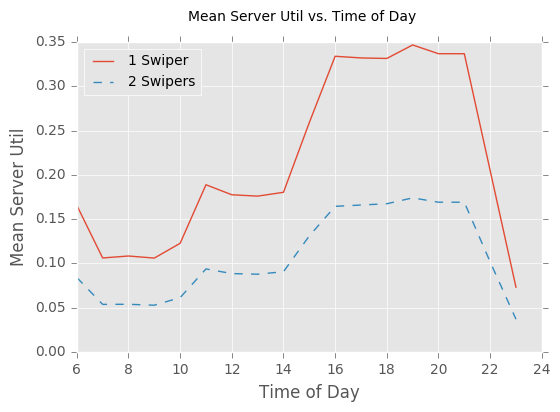

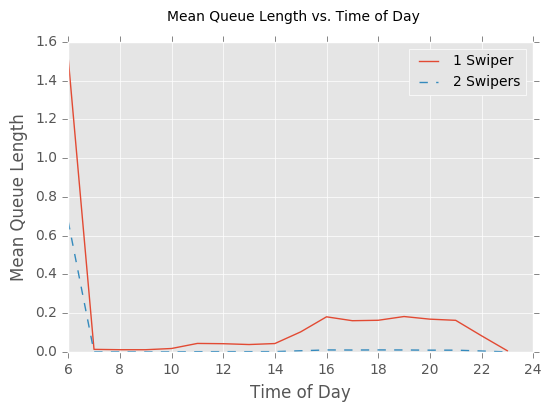

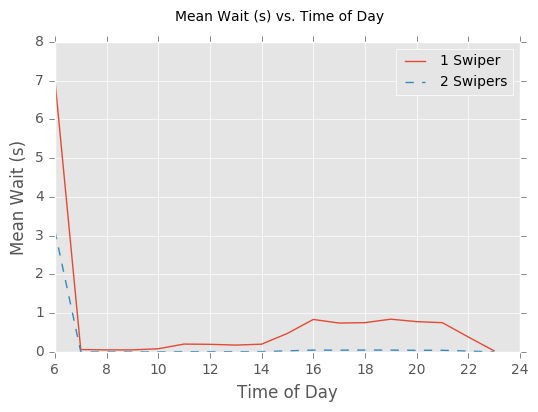

In [111]:
plt.style.use('ggplot')

plot_guys = ['Mean Server Util', 'Mean Queue Length', 'Mean Wait (s)']

for plot_guy in plot_guys:

    lines = ['-', '--']
    linecycler = cycle(lines)
    
    fig, ax = plt.subplots()
    
    time = df1.index.values+6
    
    first = df1[plot_guy].values
    second = df2[plot_guy].values
    
    ax.plot(time, first, next(linecycler), label='1 Swiper')
    ax.plot(time, second, next(linecycler), label='2 Swipers')
    
    if plot_guy == 'Mean Server Util':
        location = 'upper left'
    else:
        location = 'upper right'
        
    plt.legend(loc=location, prop={'size':10})
    ax.set_xlabel('Time of Day')
    ax.set_ylabel(plot_guy)

    fig.suptitle('%s vs. Time of Day' % plot_guy)
    plt.savefig('%s.png' % plot_guy)
    
    print(plot_guy, (second/first).mean())